In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
def createAn(x,n) :
    A=np.ones((len(x),1),int)
    xpower=A
    xtrans=np.reshape(x,(len(x),1))
    for i in range(n):
        xpower=xpower*xtrans
        A=np.hstack((A,xpower))
    return A

In [4]:
def createBn(a,y):
    y=np.reshape(y,(len(y),1))
    atrans=np.transpose(a)
    atransa=np.dot(atrans,a)
    atransiv=np.linalg.inv(atransa)
    by=np.dot(atransiv,atrans)
    b=np.dot(by,y)
    return b

In [5]:
def estimateyn(x,n,y):
    a=createAn(x,n)
    b=createBn(a,y)
    yn=np.dot(a,b)
    return yn

In [6]:
def creatEstMatr(x,yi):
    estmat=estimateyn(x,1,yi)
    estmat=np.reshape(estmat,(len(estmat)))
    for n in range(2,16):
        yn=estimateyn(x,n,yi)
        yn=np.reshape(yn,(len(yn)))
        estmat=np.vstack((estmat,yn))
        

<function matplotlib.pyplot.show(close=None, block=None)>

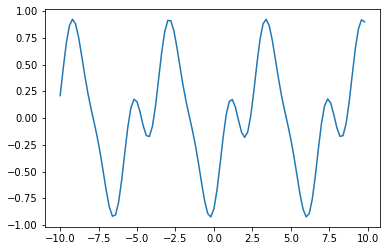

In [7]:
x = np.arange(-10 , 10 , 0.2)
y =2 * np.cos(x)/(-math.pi) + 2 * np.sin(2 * x)/(2 * math.pi) + 2 * np.cos(3 * x)/(-3 * math.pi)
plt.plot(x,y)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

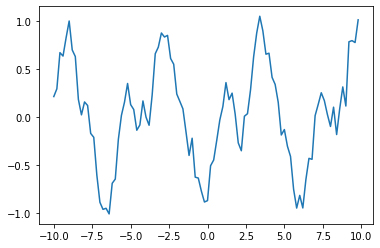

In [8]:
noise1=np.random.normal(0, 1,len(x))
y1=y+0.12*noise1
plt.plot(x,y1)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

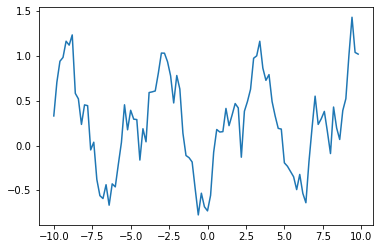

In [9]:
noise2=np.random.poisson(2,len(x))
y2=y+0.12*noise2
plt.plot(x,y2)
plt.show

In [12]:
ems1=[]
for n in range (1,16):
    yn=estimateyn(x,n,y1)
    yn=np.reshape(yn,(len(yn)))
    ems=(1/len(x))*((np.linalg.norm(yn-y))**2)
    ems1.append(ems)
min1=min(ems1)
argmin=ems1.index(min1)
print("best degree for guassian=",(argmin+1))
max1=max(ems1)
argmax=ems1.index(max1)
print("worst degree for guassian",(argmax+1))    


best degree for guassian= 15
worst degree for guassian 1


In [13]:
ems2=[]
for n in range (1,16):
    yn=estimateyn(x,n,y2)
    yn=np.reshape(yn,(len(yn)))
    ems=(1/len(x))*((np.linalg.norm(yn-y))**2)
    ems2.append(ems)
min2=min(ems2)
argmin=ems2.index(min2)
print("best degree for poisson=",(argmin+1))
max2=max(ems2)
argmax=ems2.index(max2)
print("worst degree for poisson",(argmax+1))

best degree for poisson= 15
worst degree for poisson 1


Text(0.5, 1.0, 'poisson estimation')

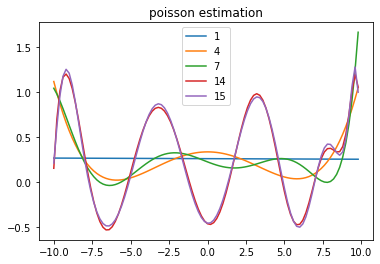

In [410]:
y1estp=yn=estimateyn(x,1,y2)
y4estp=estimateyn(x,4,y2)
y7estp=yn=estimateyn(x,7,y2)
y15estp=estimateyn(x,15,y2)
plt.plot(x,y1estp)
plt.plot(x,y4estp)
plt.plot(x,y7estp)
plt.plot(x,y15estp)
plt.legend(['1','4','7','15'])
plt.title("poisson estimation")

Text(0.5, 1.0, 'guassian  estimation')

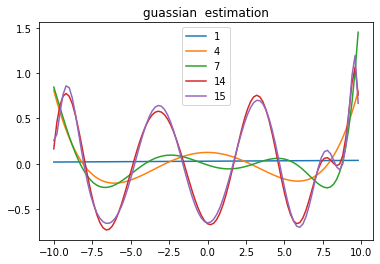

In [411]:
y1estg=yn=estimateyn(x,1,y1)
y4estg=estimateyn(x,4,y1)
y7estg=yn=estimateyn(x,7,y1)
y15estg=estimateyn(x,15,y1)
y14estg=estimateyn(x,14,y1)
plt.plot(x,y1estg)
plt.plot(x,y4estg)
plt.plot(x,y7estg)
plt.plot(x,y14estg)
plt.plot(x,y15estg)
plt.legend(['1','4','7','14','15'])
plt.title("guassian  estimation")